15 - Un abrevadero de longitud L tiene una sección transversal en forma de semicírculo con radio r (vea la figura). El depósito se está llenando de agua

![Imagen de un abrevadero](../images/abrevadero.png)

Suponga que 𝐿 = 10 pies, r = 1 pie y que v = 12.4 pies3. Determine la profundidad del agua del abrevadero con una exactitud de 10-12, empleando el método de Newton-Raphson. Emplee 15 decimales.

Solución: Para encontrar el volumen que nos piden tenemos que tener una función en base a la altura "h" y derivarla para poder ocupar el métodod de Newton-Raphson.

Iniciamos por declarar que el volumne de todo el medio cilindro sería:

$$ L A_t = 12.4 pies^3  $$

Dado que buscamos la profundidad del agua y no está completamente lleno, necesitamos contruir una función en base a los triángulos que se forman en la vista lateral del cateto, esta expresión es:
$$ L  \left( \frac{ \pi r^2 }{2} - h \sqrt{r^2 - h^2 } -r^2 sen^{-1} (\frac{h}{r}) \right) = 12.4 $$

Ahora hago mi f(x) con: 
$$ f(h) = L  \left( \frac{ \pi r^2 }{2} - h \sqrt{r^2 - h^2 } -r^2 sen^{-1} (\frac{h}{r}) \right) - 12.4 $$

Sustituyo mi constantes:

$$ f(h) = 10  \left( \frac{ \pi }{2} - h \sqrt{1 - h^2 } - sen^{-1} (h) \right) - 12.4 $$

Efectuo el producto del 10 y tengo:

$$ f(h) = \frac{ 10 \pi }{2} -10  h \sqrt{1 - h^2 } - 10 sen^{-1} (h) - 12.4 $$

Y mi derivada sería

$$ f'(h) =  -20 \sqrt{1 - x^2} $$

Ahora ejecuto el método de Newton-Rapshon

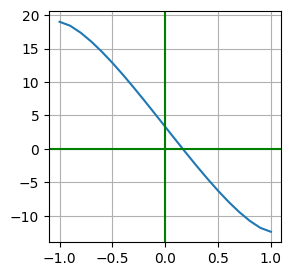

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ # de iteración ┃ x0                ┃ x1                ┃ error             ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 1              │ 0.125000000000000 │ 0.166046388892792 │ 0.041046388892792 │
│ 2              │ 0.166046388892792 │ 0.166166033435883 │ 0.000119644543091 │
│ 3              │ 0.166166033435883 │ 0.166166034658368 │ <-- solución      │
└────────────────┴───────────────────┴───────────────────┴───────────────────┘

In [10]:
import math
import numpy

from matplotlib import pyplot

from metodos_numericos import newton_raphson
from utils import imprimir_tabla

def f_de_h(h):
    return round(
        (10 * math.pi / 2 - 10 * h * math.sqrt(1 - h**2) - 10 * math.asin(h) - 12.4),
        15
    )

def derivada_de_f_de_h(h):
    return round(
        (-20 * math.sqrt(1 - h**2)),
        15
    )

# Gráfico funciones con un intervalo en donde se pueda obtener la raiz
eje_x = [x for x in numpy.arange(-1, 1.1, 0.1)]
eje_y = [f_de_h(x) for x in eje_x]

plot_carga_en_tiempo = pyplot.figure(figsize=(3,3),) 
pyplot.plot(eje_x, eje_y)
pyplot.grid(visible=True)
pyplot.axvline(0, color="g")
pyplot.axhline(0, color="g")
pyplot.show()

# Con el gráfico podemos ver que la raíz está cerca a 0.125, con ese valor inicial

resultado = newton_raphson(0.125, f_de_h, derivada_de_f_de_h, resultado=[])
imprimir_tabla(resultado)

Dado que nuestra raíz es igual a 0.166166034658368 y r = 1, 1 - 0.166166034658368 = 0.8338339653, por lo tanto: 

__La altura del abrevadero es de aproximadamente 0.833833965341 pies__